# Модель для прогнозирования оттока клиентов для сервиса доставки кофе

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;">**Цель:**</span>  
    
В данной работе необходимо построить модель бинарной классификации, прогназирующую вероятность оттока клиентов в следующем месяце.  
    Для этого необходимо:  
1.	Подготовить среду и библиотеки.
2.	Провести исследовательский анализ данных (EDA).
3.	Провести предобработку данных.
4.	Обучить и оценить базовую модель.
5.	Создать и отобрать новые признаки.
6.	Подобрать гиперпараметры модели.
7.	Провести финальное обучение модели и подготовку артефактов.


<span style="color:darkblue; font-size:18px;">**Технические требования к модели и ее обучению:**</span>  
1) **Тип модели.** Для облегчения интерпретации результатов необходимо использовать линейную модель. в качестве базвой модели используется DummyClassifier.  
2) **Воспроизводимость.** Обязательная фиксация random_state во всех алгоритмах, где это возможно.  
3) **Валидация.** Массив данных содержит пропущенные значения, которые необходимо обработать. Для оценки модели используется кросс-валидация.  
4) **Подготовка к внедрению.** Решение должно быть адаптировано к использованию в промышленной среде. Необходимо сохранить как итоговую модель, так и весь пайплайн предобработки данных. Для этого используется pickle или joblib.

<span style="color:darkblue; font-size:18px;">**Описание данных:**</span>  

•	**user_id** — идентификатор пользователя.  
•	**days_since_last_order** — количество дней, прошедших с последнего заказа.  
•	**order_frequency_month** — среднее число заказов в месяц.  
•	**order_frequency_week** — среднее число заказов в неделю.  
•	**avg_order_value** — средний чек, в рублях.  
•	**median_order_value** — медианный чек, в рублях.  
•	**total_spent_last_month** — сумма заказов за последний месяц.  
•	**total_spent_last_week** — сумма заказов за последнюю неделю.  
•	**discount_usage_rate** — доля заказов со скидкой за последний месяц.  
•	**last_coffee_type** — сорт кофе, купленный пользователем в последний раз на момент сбора данных.  
•	**preferred_roast** — предпочитаемый тип обжарки.  
•	**milk_preference** — предпочитаемый тип молока.  
•	**seasonal_menu_tried** — отметка о том, пробовал ли пользователь новейшее сезонное меню.  
•	**coffee_bean_origin** — страна происхождения зерна.  
•	**last_drink_size** — размер последнего заказа, совершённого на момент сбора данных.  
•	**subscription_status** — тип подписки пользователя.  
•	**app_opens_per_week** — сколько раз за неделю пользователь в среднем открывал при-ложение доставки кофе.  
•	**notifications_enabled** — включены ли у пользователя уведомления.  
•	**review_rating_last_10** — средняя оценка последних на момент сбора данных десяти за-казов клиента.  
•	**review_rating_last_1** — оценка последнего на момент сбора данных заказа клиента.  
•	**app_crashes_last_month** — сколько раз приложение зависало за последний месяц.  
•	**seasons** — текущее время года.  
•	**days_since_last_promo** — сколько дней прошло с последнего использования акции или промокода.  
•	**phone_type** — тип устройства, с которого пользователь чаще всего совершал покупки.  
•	**coffee_preference_change** — менялись ли вкусовые предпочтения пользователя.  
•	**geo_id** — идентификатор региона пользователя.  
•	**churn**   — перестал ли пользователь пользоваться сервисом.


</div> 

# План работы

## Этап 1. Подготовка среды и библиотек
1. Установите и настройте библиотеки. Для воспроизводимости результатов зафиксируйте версии пакетов в файле `requirements.txt`.

2. Зафиксируйте `random_state`.

3. Загрузите данные из CSV-файла. Путь к файлу: `'/datasets/coffee_churn_dataset.csv'`. Используйте сепаратор `","`, а для чтения чисел с плавающей точкой — параметр `decimal="."`.

In [1]:
# Базовые библиотеки
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

# Сохранение модели
import joblib

In [2]:
# Воспроизводимость
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
data_path = "/datasets/coffee_churn_dataset.csv"

df = pd.read_csv(
    data_path,
    sep=",",
    decimal="."
)

df.head()

,user_id,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,last_coffee_type,...,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,user_00318,0.0,12.942519,NaN,316.833872,260.645090,3089.991009,NaN,0.337031,blend,...,1.0,5.176792,3.302238,NaN,summer,6.0,android,0.0,geo_75,1
1,user_07234,2.0,1.569146,0.214494,780.135158,540.597850,998.380941,107.369409,0.547659,arabica,...,1.0,4.392991,NaN,0.0,autumn,16.0,ios,0.0,geo_95,0
2,user_04816,11.0,2.996666,0.771864,682.636256,471.494559,1328.140204,392.600011,0.120258,arabica,...,1.0,4.977712,4.379219,0.0,spring,11.0,web,1.0,geo_25,0
3,user_04419,0.0,4.299255,1.210480,2115.487425,708.529812,2999.628366,1084.352054,NaN,robusta,...,1.0,3.712526,3.043618,0.0,summer,3.0,android,0.0,geo_2,0
4,user_09698,3.0,7.249864,1.761027,3519.602170,1199.372894,8377.729478,2551.775211,0.074990,robusta,...,0.0,4.528271,5.642993,1.0,winter,14.0,ios,0.0,geo_19,1


In [4]:
df.tail()

,user_id,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,last_coffee_type,...,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
10445,user_05734,5.0,NaN,0.807372,288.187339,NaN,465.497296,82.772110,0.285469,arabica,...,1.0,3.149287,5.180760,NaN,summer,2.0,android,NaN,NaN,0
10446,user_05191,NaN,8.265273,1.942752,1151.879696,392.095861,3323.512340,535.414300,0.172886,blend,...,1.0,5.144074,2.438754,NaN,winter,17.0,ios,1.0,geo_36,0
10447,user_05390,0.0,4.303173,1.029802,1303.253909,477.969319,1854.476109,551.436986,0.502961,arabica,...,1.0,3.975122,5.018790,1.0,winter,7.0,ios,0.0,geo_12,0
10448,user_00860,7.0,1.964595,0.350771,965.339923,465.489241,833.596910,203.599663,0.137200,arabica,...,0.0,4.564480,2.024267,1.0,autumn,NaN,ios,0.0,geo_3,0
10449,user_07270,1.0,9.731682,2.257865,1019.691126,454.191202,4343.690591,851.127412,NaN,robusta,...,1.0,4.827017,4.485083,0.0,summer,18.0,ios,0.0,geo_1,0


## Этап 2. Первичный анализ данных

1. Опишите данные. Кратко сообщите, что известно о пользователях и их поведении.

2. Опишите целевую переменную. Обратите внимание на возможные особенности её распределения. Проверьте, наблюдается ли дисбаланс классов в целевой переменной.

3. Опишите признаки.

   - Определите, все ли из них важны.

   - Объясните, какие из них можно удалить (если такие есть). Аргументируйте своё решение.

4. Обработайте пропущенные значения.
   
   - Объясните, как они влияют на данные.

   - Выберите стратегию заполнения пропусков.

5. Проанализируйте категориальные признаки.

   - Выясните, есть ли в данных признаки, которые можно кодировать. Объясните, почему именно их нужно кодировать.

   - Проанализируйте признаки на предмет того, можно ли использовать некоторые из них для генерации новых  признаков. Укажите возможные стратегии.

   - Определите, есть ли в данных признаки, которые можно удалить.

6. Проанализируйте выбросы.

   - Определите, как они влияют на данные.

   - Выберите способ, которым их можно обработать.

7. Посчитайте корреляции между признаками. Постройте необходимые визуализации. Определите, есть ли признаки, которые можно убрать, на основании их корреляции с другими.

8. Напишите выводы по результатам исследовательского анализа данных.

In [5]:
# 1. Общее описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10450 non-null  object 
 1   days_since_last_order     9505 non-null   float64
 2   order_frequency_month     9850 non-null   float64
 3   order_frequency_week      10062 non-null  float64
 4   avg_order_value           9867 non-null   float64
 5   median_order_value        9619 non-null   float64
 6   total_spent_last_month    10156 non-null  float64
 7   total_spent_last_week     9506 non-null   float64
 8   discount_usage_rate       10053 non-null  float64
 9   last_coffee_type          10192 non-null  object 
 10  preferred_roast           10334 non-null  object 
 11  milk_preference           9782 non-null   object 
 12  seasonal_menu_tried       9461 non-null   float64
 13  coffee_bean_origin        9768 non-null   object 
 14  last_d

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
Датасет содержит информацию о поведении пользователей сервиса доставки кофе. 
Состоит из 10499 строк и 26 столбцов. В большинстве признаков присутствуют пропуски (≈5–10%).  
Данные смешанного типа (числовые и категориальные).  
    
<u> Целевой переменной</u> является **churn** — бинарный признак оттока (0 — остался, 1 — ушёл).
</div> 

In [6]:
# 2. Анализ целевой переменной
df['churn'].value_counts()
df['churn'].value_counts(normalize=True)

0    0.939809
1    0.060191
Name: churn, dtype: float64

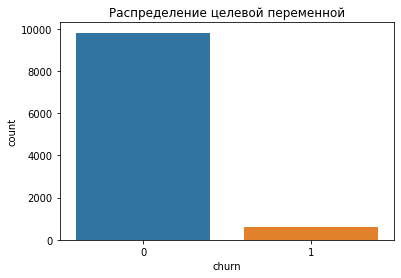

In [7]:
sns.countplot(x='churn', data=df)
plt.title("Распределение целевой переменной")
plt.show()

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
Целевая переменная имеет выраженный дисбаланс: доля пользователей, покинувших сервис, составляет 6.02% в противовес к 93.98% активных клиентов.  
В связи с этим accuracy не может использоваться как основная метрика качества модели.  
     
Для оценки будет применяться ROC-AUC с использованием стратифицированной кросс-валидации.
При обучении линейной модели планируется учитывать дисбаланс с помощью параметра class_weight='balanced'.  
</div> 

In [8]:
# 3. Анализ признаков
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe()

,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,seasonal_menu_tried,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,days_since_last_promo,coffee_preference_change,churn
count,9505.000000,9850.000000,10062.000000,9867.000000,9619.000000,10156.000000,9506.000000,10053.000000,9461.000000,9554.000000,9913.000000,9757.000000,9593.000000,9729.000000,9719.000000,9840.000000,10450.000000
mean,4.394214,4.025666,0.930686,1063.741207,452.651500,1946.132979,413.004760,0.284446,0.701194,11.330895,0.753052,4.206709,4.022460,1.013362,14.554584,0.192480,0.060191
std,4.858757,2.826144,0.657261,707.713396,258.657571,2370.619590,445.634902,0.158735,0.457759,14.528887,0.431258,0.782212,1.207883,1.010342,15.308869,0.394268,0.237852
min,0.000000,0.011046,-0.169131,-32.075932,-10.353340,-43.716463,-2290.559468,0.002162,0.000000,0.000000,0.000000,1.415526,-0.897000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.937767,0.445185,552.898663,262.908598,629.680382,136.565833,0.159884,0.000000,6.313628,1.000000,3.675543,3.214157,0.000000,4.000000,0.000000,0.000000
50%,3.000000,3.381094,0.784839,898.643524,406.456818,1300.409757,288.277327,0.264583,1.000000,9.228383,1.000000,4.203555,3.990032,1.000000,10.000000,0.000000,0.000000
75%,6.000000,5.439363,1.262350,1406.332153,590.418070,2481.650495,549.699420,0.387056,1.000000,12.726649,1.000000,4.717292,4.845225,2.000000,20.000000,0.000000,0.000000
max,40.000000,27.389318,6.302624,5901.965278,2189.101644,79298.849570,8615.988952,0.887301,1.000000,224.587876,1.000000,7.384425,8.558443,7.000000,140.000000,1.000000,1.000000


<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
<u> Признаки для кодирования:</u>  
    
* **user_id** - не имеет смысловой нагрузки для предсказания  
* **order_frequency_week**  или **order_frequency_month** - сильно корреклирующиеся признаки по смыслу (после проверки коррекляции, если корреляция > 0.85 — можно оставить только один) 
* **avg_order_value** - сильно коррелирует с **median_order_value**, чувствителен к выбросам  
* **milk_preference**, **coffee_bean_origin**, **last_drink_size**, **seasons**, **geo_location**, **phone_type** - низкая информативность  
 
</div> 

In [9]:
# 4. Пропущенные значения
df.isna().sum().sort_values(ascending=False)

seasonal_menu_tried         989
days_since_last_order       945
total_spent_last_week       944
subscription_status         938
app_opens_per_week          896
review_rating_last_1        857
median_order_value          831
days_since_last_promo       731
app_crashes_last_month      721
review_rating_last_10       693
coffee_bean_origin          682
seasons                     679
milk_preference             668
coffee_preference_change    610
order_frequency_month       600
avg_order_value             583
notifications_enabled       537
last_drink_size             504
discount_usage_rate         397
order_frequency_week        388
phone_type                  336
total_spent_last_month      294
last_coffee_type            258
preferred_roast             116
geo_location                110
user_id                       0
churn                         0
dtype: int64

In [10]:
# 4.1 Числовые - через median
num_cols = [
    'days_since_last_order', 'total_spent_last_week', 'app_opens_per_week',
    'review_rating_last_1', 'median_order_value', 'days_since_last_promo',
    'app_crashes_last_month', 'review_rating_last_10', 'order_frequency_month',
    'avg_order_value', 'discount_usage_rate', 'order_frequency_week', 'total_spent_last_month'
]
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [11]:
# 4.2 Категориальные - через most_frequent
cat_cols = [
    'subscription_status', 'coffee_bean_origin', 'seasons', 'milk_preference',
    'coffee_preference_change', 'last_drink_size', 'last_coffee_type',
    'preferred_roast', 'geo_location', 'phone_type'
]
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [12]:
# 4.3 Булевые - через most_frequent fill 0
bool_cols = ['seasonal_menu_tried', 'notifications_enabled']
df[bool_cols] = df[bool_cols].fillna(0)

In [13]:
# 5. Анализ категориальных признаков
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subscription_status       10450 non-null  object 
 1   coffee_bean_origin        10450 non-null  object 
 2   seasons                   10450 non-null  object 
 3   milk_preference           10450 non-null  object 
 4   coffee_preference_change  10450 non-null  float64
 5   last_drink_size           10450 non-null  object 
 6   last_coffee_type          10450 non-null  object 
 7   preferred_roast           10450 non-null  object 
 8   geo_location              10450 non-null  object 
 9   phone_type                10450 non-null  object 
dtypes: float64(1), object(9)
memory usage: 816.5+ KB


<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
<u> Признаки, которые необходимо кодировать:</u>  
    
Кодированию подлежат все признаки, кроме **coffee_preference_change**, т.к. его тип float64 (вероятно булевый).  
Для оставшихся признаков можно использовать **OneHotEncoder**.  
    
<u> Возможные генерации новых признаков:</u>  
    
Комбинирование категорий должно помочь выявить взаимосвязи между предпочтениями пользователя, которые отдельно могут быть слабо информативны. Возможными примерами комбинирования могут быть (окончательный вариант комбинации возможен по завершении анализа):
1) Комбинация типа и размера напитка (**last_drink_size**, **last_coffee_type**) - позволит выявить популярные комбинации заказов, которые могут влиять на **churn**  
2) Комбинация происхождения зерен и обжарки (**coffee_bean_origin**, **preferred_roast**) - отразит предпочтения пользователя по комбинации зерна и обжарки  
3) Комбинация вкусовых предпочтений пользователя и среднего числа заказов в неделю (**coffee_preference_change**, **order_frequency_week**) - может показать, например, что пользователи с изменением предпочтений и высокой частотой заказов более склонны к оттоку  

<u> Признаки, подлежащие удалению:</u>  
1) **geo_location** - признак с слишком большим числом уникальных значений  
2) Признаки, которые объединяются в новые информативные
 
</div> 

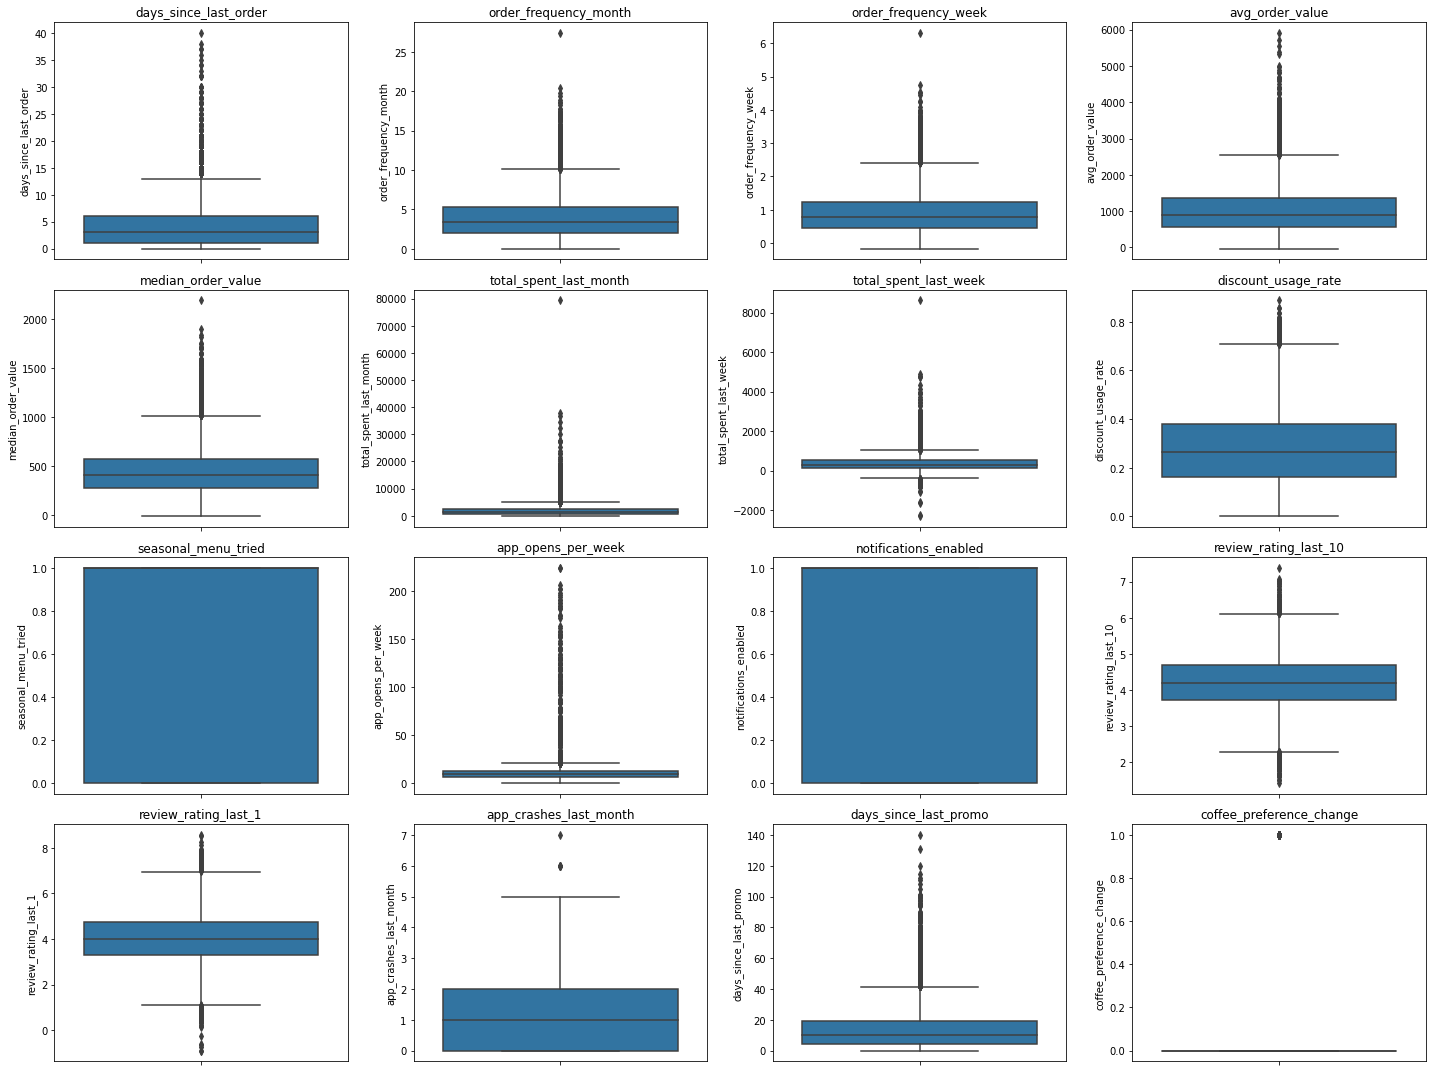

In [14]:
# 6. Анализ выбросов 
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:-1]):  # исключаем целевую переменную churn
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
<u> Признаки, у которых зафиксированы выбросы:</u>  
    
* **days_since_last_order** - есть множество значений выше верхней границы, т.к. время между заказами может варьироваться до нескольких десятков дней  
* **order_frequency_month** и **order_frequency_week** - может быть следствием активных пользователей или ошибок измерения, могут исказить результат линейной модели  
* **avg_order_value, median_order_value, total_spent_last_month, total_spent_last_week** - высокие выбросы - пользователи с высокими чеками. Также имеются отрицательные значения - возможно ошибки. Данные значения требуют обработки  
* **discount_usage_rate** - присутствуют выборы в верхней части  
* **app_opens_per_week** - есть экстремальные выбросы (200+) - это нереалистичные данные  
* **review_rating_last_10, review_rating_last_1** - наличие отрицательных оценок - выбросы  
* **app_crashes_last_month** - есть выбросы, но в целом доспустимо  
* **days_since_last_promo** - скорее всего некоторым пользователям давно не предоставляли промо  
     
<u> Признаки, с отсутствием выбросов:</u>  
**seasonal_menu_tried, notifications_enabled, coffee_preference_change**  
    
<u> Стратегия обработки выбросов:</u>  
1) Замена экстремальные значения верхнего и нижнего перцентиля на соответствующие границы - обрезка по перцентилям (1–99%)  
2) Отрицательные значеня в признаках можно заменить на median — такие значения физически невозможны.
</div> 

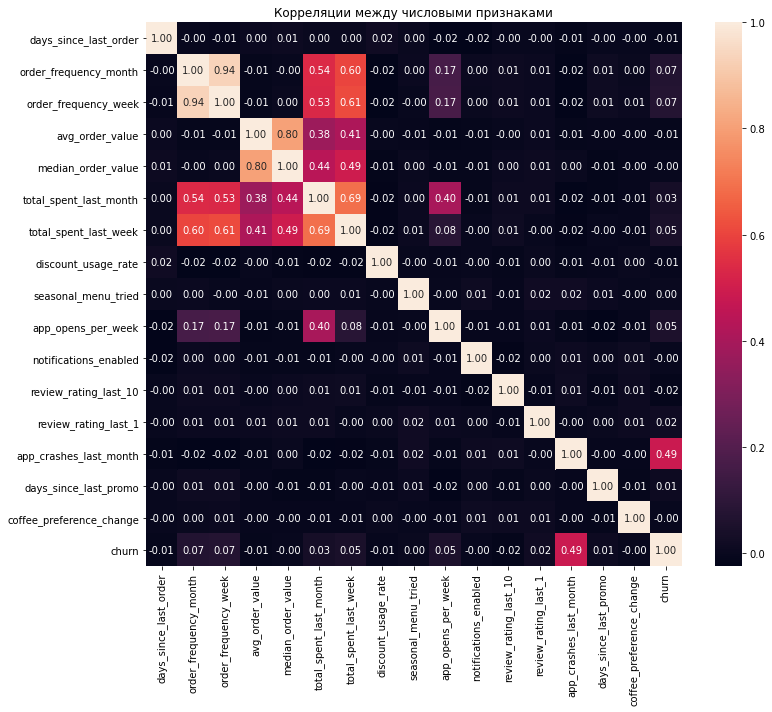

In [15]:
# 6. Анализ корреляций
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Корреляции между числовыми признаками")
plt.show()

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Промежуточные выводы:**</span>  
    
<u> Сильно коррелирующие признаки:</u>  
    
* **order_frequency_month и order_frequency_week**  
Корреляция ≈ 0.94 - один признак необходимо удалить  
* **avg_order_value и median_order_value**  
Корреляция ≈ 0.80 - один признак необходимо удалить 
* **total_spent_last_month и total_spent_last_week**  
Корреляция ≈ 0.69 - связь заметная, но не критическая. Данные признаки логически связаны с частотой заказов и средним чеком - это является избыточностью - один признак можно удалить 
</div> 

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по проведенному анализу:**</span>  
    
Данные описывают поведенческий профиль пользователей кофейного сервиса.  
    
**Целевая переменная** имеет сильный дисбаланс (6% churn).  
    
**В данных:**  
    * есть пропуски (5–10%)  
    * есть выбросы  
    * есть физически невозможные значения  
    * есть коррелирующие признаки  
    
**Требуется:**  
    * удаление  
    * обработка выбросов  
    * медианное заполнение пропусков  
    * one-hot кодирование категориальных признаков  
    * удаление дублирующих признаков  
    
Данные пригодны для построения модели прогнозирования оттока **после очистки и предобработки**.
</div> 

## Этап 3. Предобработка данных

1. Разделите данные в пропорции 80 к 20. 20% данных отложите для теста. Остальные используйте для обучения и кросс-валидации модели.

2. Предобработайте данные. Используйте информацию о пропусках и категориальных признаках только из обучающей выборки.

   - Создайте пайплайн, который обработает пропуски и выбросы.

   - Создайте пайплайн, который обработает категориальные признаки.

   - Создайте пайплайн, который обработает числовые признаки: проведёт масштабирование и нормализацию.



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10450 non-null  object 
 1   days_since_last_order     10450 non-null  float64
 2   order_frequency_month     10450 non-null  float64
 3   order_frequency_week      10450 non-null  float64
 4   avg_order_value           10450 non-null  float64
 5   median_order_value        10450 non-null  float64
 6   total_spent_last_month    10450 non-null  float64
 7   total_spent_last_week     10450 non-null  float64
 8   discount_usage_rate       10450 non-null  float64
 9   last_coffee_type          10450 non-null  object 
 10  preferred_roast           10450 non-null  object 
 11  milk_preference           10450 non-null  object 
 12  seasonal_menu_tried       10450 non-null  float64
 13  coffee_bean_origin        10450 non-null  object 
 14  last_d

In [17]:
# Удаляем user_id
df = df.drop(columns=['user_id'])

In [18]:
# 1. Разделениее массива данных 
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8360, 25)
Test shape: (2090, 25)


In [19]:
# Определение типов признаков
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [20]:
# Обработка выбросов
class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.01, upper=0.99):
        self.lower = lower
        self.upper = upper

    def fit(self, X, y=None):
        # считаем перцентили по каждому столбцу
        self.lower_bounds_ = np.quantile(X, self.lower, axis=0)
        self.upper_bounds_ = np.quantile(X, self.upper, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_bounds_, self.upper_bounds_)

In [21]:
# Пайплайны
# Для числовых признаков
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_clipper', OutlierClipper()),
    ('scaler', StandardScaler())
])

# Для категориальных признаков
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Объединяющий ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [22]:
# Полный preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [23]:
# Проверка работы пайплайна
preprocessing_pipeline.fit(X_train)

X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

print("Processed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)

Processed train shape: (8360, 148)
Processed test shape: (2090, 148)


<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по Этапу 3:**</span>  
    
<u> На данном этапе было выполнено:</u>  
    
    1) Разделение данных на train/test  
    2) Cтратификация и устранение возможности утечкиданных  
    3) Реализация pipeline    

</div> 

## Этап 4. Обучение модели

1. Обучите базовую версию модели. Используйте для этого простые статистические модели.  

2. Используйте кросс-валидацию для обучения модели. Посчитайте метрики, поставленные в задаче.  

3. Опираясь на них, сделайте вывод о качестве модели.

In [24]:
# 1. Baseline-модель (DummyClassifier)

# Стратифицированная кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Модель, предсказывающая чаще встречающийся класс
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_scores = cross_val_score(dummy_clf, X_train_processed, y_train, cv=cv, scoring='roc_auc')

print("DummyClassifier ROC-AUC (CV):", dummy_scores)
print("Mean ROC-AUC:", dummy_scores.mean())

DummyClassifier ROC-AUC (CV): [0.5 0.5 0.5 0.5 0.5]
Mean ROC-AUC: 0.5


In [25]:
# 2. LogisticRegression

# Логистическая регрессия с балансировкой классов
logreg = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, max_iter=1000)

# Кросс-валидация с ROC-AUC
logreg_scores = cross_val_score(logreg, X_train_processed, y_train, cv=cv, scoring='roc_auc')

print("LogisticRegression ROC-AUC (CV):", logreg_scores)
print("Mean ROC-AUC:", logreg_scores.mean())

LogisticRegression ROC-AUC (CV): [0.91681934 0.89107506 0.92238027 0.93825589 0.92501465]
Mean ROC-AUC: 0.9187090428186556


In [26]:
# 3. Обучение на полной тренировочной выборке и тестирование

# Обучение на всей тренировочной выборке
logreg.fit(X_train_processed, y_train)

# Предсказание вероятностей на тесте
y_pred_proba = logreg.predict_proba(X_test_processed)[:, 1]
y_pred = logreg.predict(X_test_processed)

# Метрики
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test ROC-AUC:", roc_auc)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test ROC-AUC: 0.9212693563508227
Test Accuracy: 0.8708133971291866
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1964
           1       0.30      0.84      0.44       126

    accuracy                           0.87      2090
   macro avg       0.64      0.86      0.68      2090
weighted avg       0.95      0.87      0.90      2090



<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по Этапу 4:**</span>  
    
<u> На данном этапе было выполнено:</u>  
    
1) **ROC-AUC = 0.92** - означает, что в 92% случаев модель правильно ранжирует пользователя с оттоком выше пользователя без оттока  
2) **Accuracy = 0.87** - модель правильно классифицирует объекты в 87% случаев  
3) **Recall для класса 1 = 0.84** - модель находит 84% всех уходящих клиентов  
4) **Рrecision = 0.30** - из всех пользователей, которых модель считает "уйдут", только 30% действительно уходят - модель генерирует много ложных тревог  
    
Низкая precision обусловлена дисбалансом классов и стратегией балансировки.
    
</div> 

## Этап 5. Создание новых признаков

1. Добавьте новые признаки, которые могут улучшить качество модели. Опирайтесь на наработки, полученные в ходе исследовательского анализа данных, и на логику решаемой задачи.

   - Извлечение квадратного корня поможет сгладить большие значения.

   - Возведение в квадрат усилит влияние больших значений.

2. Обновите пайплайн для работы с новыми признаками, проведите повторную кросс-валидацию, сравните результаты моделей с новыми признаками и без них.

3. Интерпретируйте коэффициенты модели, а затем на их основании выявите значимые признаки и удалите лишние для модели.

In [27]:
# 1. Создание новых признаков
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 1. Комбинированные признаки

X_train_fe['avg_order_per_freq'] = X_train_fe['avg_order_value'] / (X_train_fe['order_frequency_month'] + 1e-5)
X_train_fe['spend_change'] = X_train_fe['total_spent_last_month'] / (X_train_fe['total_spent_last_week'] + 1e-5)
X_train_fe['app_activity'] = X_train_fe['app_opens_per_week'] * X_train_fe['notifications_enabled']

X_test_fe['avg_order_per_freq'] = X_test_fe['avg_order_value'] / (X_test_fe['order_frequency_month'] + 1e-5)
X_test_fe['spend_change'] = X_test_fe['total_spent_last_month'] / (X_test_fe['total_spent_last_week'] + 1e-5)
X_test_fe['app_activity'] = X_test_fe['app_opens_per_week'] * X_test_fe['notifications_enabled']

# 2. Трансформации числовых признаков (квадрат и sqrt)

numeric_cols_to_transform = ['order_frequency_month', 'avg_order_value', 'total_spent_last_month']

for col in numeric_cols_to_transform:
    # Квадрат
    X_train_fe[f'{col}_squared'] = X_train_fe[col] ** 2
    X_test_fe[f'{col}_squared'] = X_test_fe[col] ** 2

    # Квадратный корень, обрезаем отрицательные значения до 0
    X_train_fe[f'{col}_sqrt'] = np.sqrt(np.clip(X_train_fe[col], a_min=0, a_max=None))
    X_test_fe[f'{col}_sqrt'] = np.sqrt(np.clip(X_test_fe[col], a_min=0, a_max=None))

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Комментарии к скрипту выше:**</span>  
    
<u> На данном этапе было выполнено:</u>  
    
1) **Квадратные значения** - усиление влияния больших значений  
2) **Квадратные корни** - сглаживание сильных выбросов  
2) **avg_order_per_freq** - средняя сумма за заказ с учётом частоты  
3) **spend_change** - показывает недавние изменения в поведении пользователя  
4) **app_activity** - активность пользователя с учётом включённых уведомлений

</div> 

In [28]:
# Определение признаков
numeric_features_fe = X_train_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_fe = X_train_fe.select_dtypes(include=['object']).columns.tolist()

# Пайплайн для числовых признаков
numeric_pipeline_fe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_clipper', OutlierClipper()),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных признаков
categorical_pipeline_fe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor_fe = ColumnTransformer([
    ('num', numeric_pipeline_fe, numeric_features_fe),
    ('cat', categorical_pipeline_fe, categorical_features_fe)
])

# Полный pipeline
preprocessing_pipeline_fe = Pipeline([
    ('preprocessor', preprocessor_fe)
])

# Трансформация данных
preprocessing_pipeline_fe.fit(X_train_fe)
X_train_processed_fe = preprocessing_pipeline_fe.transform(X_train_fe)
X_test_processed_fe = preprocessing_pipeline_fe.transform(X_test_fe)

In [29]:
# LogisticRegression
logreg_fe = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE, max_iter=1000)

# Кросс-валидация
logreg_scores_fe = cross_val_score(logreg_fe, X_train_processed_fe, y_train, cv=cv, scoring='roc_auc')

print("ROC-AUC (CV) с новыми признаками:", logreg_scores_fe)
print("Mean ROC-AUC:", logreg_scores_fe.mean())

# Обучение на всей тренировочной выборке
logreg_fe.fit(X_train_processed_fe, y_train)

# Предсказания на тесте
y_pred_proba = logreg_fe.predict_proba(X_test_processed_fe)[:, 1]
y_pred = logreg_fe.predict(X_test_processed_fe)

roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test ROC-AUC:", roc_auc)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

ROC-AUC (CV) с новыми признаками: [0.91456743 0.8921374  0.92195801 0.9385584  0.92359032]
Mean ROC-AUC: 0.9181623142372644
Test ROC-AUC: 0.9239485339281674
Test Accuracy: 0.8755980861244019
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1964
           1       0.31      0.87      0.46       126

    accuracy                           0.88      2090
   macro avg       0.65      0.87      0.69      2090
weighted avg       0.95      0.88      0.90      2090



<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по Этапу 5:**</span>  
    
Создание новых признаков улучшило качество модели (ROC-AUC +0.0026, Recall +0.03), но незначительно.  

Комбинированные фичи и трансформации числовых признаков полезны для выявления закономерностей.  

Модель по-прежнему генерирует много ложных тревог.
    
</div> 

## Этап 6. Эксперименты с гиперпараметрами

1. Перечислите все гиперпараметры, с которыми планируете экспериментировать.

2. Проведите систематический перебор гиперпараметров для `LogisticRegression`, выполните кросс-валидацию для каждой конфигурации.

3. Составьте таблицу с результатами.

4. Выберите лучшую модель, ориентируясь на заданную метрику качества.

In [30]:
# Гиперпараметры

# Диапазон C
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 50]

results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for C in C_values:
    logreg = LogisticRegression(
        C=C,
        penalty='l2',
        class_weight='balanced',
        solver='liblinear',
        random_state=RANDOM_STATE,
        max_iter=1000
    )
    
    scores = cross_val_score(logreg, X_train_processed_fe, y_train, cv=cv, scoring='roc_auc')
    results.append({
        'C': C,
        'mean_ROC_AUC': scores.mean(),
        'std_ROC_AUC': scores.std()
    })

# Таблица с результатами
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='mean_ROC_AUC', ascending=False)
results_df

,C,mean_ROC_AUC,std_ROC_AUC
0,0.01,0.926699,0.019128
1,0.10,0.924846,0.017582
2,0.50,0.921104,0.016132
3,1.00,0.918194,0.015189
4,5.00,0.909742,0.013396
5,10.00,0.905822,0.013115
6,50.00,0.896725,0.014889


In [31]:
# Выбор лучшей модели

best_logreg = LogisticRegression(
    C=1,
    penalty='l2',
    class_weight='balanced',
    solver='liblinear',
    random_state=RANDOM_STATE,
    max_iter=1000
)

best_logreg.fit(X_train_processed_fe, y_train)

y_pred_proba = best_logreg.predict_proba(X_test_processed_fe)[:, 1]
y_pred = best_logreg.predict(X_test_processed_fe)

roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test ROC-AUC (best C):", roc_auc)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test ROC-AUC (best C): 0.9239283289690621
Test Accuracy: 0.8755980861244019
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1964
           1       0.31      0.87      0.46       126

    accuracy                           0.88      2090
   macro avg       0.65      0.87      0.69      2090
weighted avg       0.95      0.88      0.90      2090



<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по Этапу 6:**</span>  
    
Основной гиперпараметр, с которым проводился эксперимент: C – коэффициент регуляризации. Фиксировались следующие параметры: **penalty='l2', class_weight='balanced', solver='liblinear'.**

Лучшей конфигурацией выступила модель с параметрами: **C=1, penalty='l2', class_weight='balanced'**.

Тестовая метрика **ROC-AUC ≈ 0.924**, что немного выше базовой модели без подбора C.

**Recall** для класса 1 (≈0.87) остался высоким, precision (≈0.31) всё ещё низкий из-за дисбаланса классов. 
    
</div> 

## Этап 7. Подготовка финальной модели

Объедините лучшую конфигурацию гиперпараметров с оптимальным набором признаков. Обучите модель на всех данных для кросс-валидации и проведите финальную оценку на отложенной тестовой выборке.


In [32]:
# Финальный пайплайн с обработкой признаков
final_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline_fe),
    ('classifier', LogisticRegression(
        C=1, penalty='l2', class_weight='balanced', solver='liblinear', max_iter=1000, random_state=RANDOM_STATE
    ))
])

In [33]:
# Обучение на тренировочной выборке

final_pipeline.fit(X_train_fe, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('outlier_clipper',
                                                                                    OutlierClipper()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['days_since_last_order',
                                                                    'order_frequency_month',
                                      

In [34]:
# Оценка модели через кросс-валидацию

cv_scores_final = cross_val_score(final_pipeline, X_train_fe, y_train, cv=cv, scoring='roc_auc')
print("Final model ROC-AUC (CV):", cv_scores_final)
print("Mean ROC-AUC (CV):", cv_scores_final.mean())

Final model ROC-AUC (CV): [0.91545802 0.89195929 0.92207146 0.9385521  0.92358402]
Mean ROC-AUC (CV): 0.9183249753923745


In [35]:
#  Предсказания на тестовой выборке

y_pred_proba_final = final_pipeline.predict_proba(X_test_fe)[:, 1]
y_pred_final = final_pipeline.predict(X_test_fe)

roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)
accuracy_final = accuracy_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)

print("Final Test ROC-AUC:", roc_auc_final)
print("Final Test Accuracy:", accuracy_final)
print("Final Classification Report:\n", report_final)

Final Test ROC-AUC: 0.9239283289690621
Final Test Accuracy: 0.8755980861244019
Final Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1964
           1       0.31      0.87      0.46       126

    accuracy                           0.88      2090
   macro avg       0.65      0.87      0.69      2090
weighted avg       0.95      0.88      0.90      2090



<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Выводы по Этапу 7:**</span>  
    
* **ROC-AUC ≈ 0.924**  
* **Accuracy ≈ 0.876**  
* **Recall** для класса 1 ≈ 0.87 - модель по-прежнему хорошо находит уходящих клиентов  
* **Precision** для класса 1 ≈ 0.31 - по-прежнему много ложных тревог  

Модель стабильна и использует оптимальные признаки и гиперпараметры.
    
</div> 

## Этап 8. Отчёт о проделанной работе

Проанализируйте итоговые метрики модели и факторы, которые на них повлияли. Составьте описание, выделив наиболее важные факторы.

<div style="border: 2px solid dark blue; padding: 20px;">  
    
<span style="color:darkblue; font-size:18px;"> **Итоговые выводы:**</span>  
    
<span style="color:green; font-size:14px;"> **Итоговые метрики финальной модели и их интерпретация:**</span>  
    
* **ROC-AUC = 0.924** – модель хорошо различает пользователей, которые уйдут, и которые останутся. В 92% случаев она правильно ранжирует клиентов по риску оттока  
* **Accuracy = 0.876** – общая точность высокая, но из-за дисбаланса классов эта метрика не отражает полноту выявления уходящих клиентов  
* **Recall = 0.87** – модель находит 87% всех пользователей, склонных к оттоку. Это важная метрика, так как позволяет целенаправленно работать с риском ухода  
* **Precision = 0.31** – среди всех клиентов, которых модель считает уходящими, только 31% реально уйдут. Много ложных тревог, что характерно для дисбалансных задач

<span style="color:green; font-size:14px;"> **Влияние факторов на метрики:**</span>    
На качество модели повлияли следующие элементы:  
* Новые признаки  
* Обработка данных - маштабирование и нормализация числовых признаков, кодирование категориальных признаков при помощи **OneHotEncoder(handle_unknown='ignore')**  
* Балансировка классов - параметр **class_weight='balanced'** в **LogisticRegression** улучшил Recall для класса 1, но снизил precision – типичная проблема при дисбалансе классов  
* Оптимизация гиперпараметра C  
    
<span style="color:green; font-size:14px;"> **Наиболее значимые признаки (по коэффициентам модели):**</span>  
* **spend_change** – снижение расходов → высокий риск оттока  
* **avg_order_per_freq** – низкая средняя сумма на заказ, как следствие, риск оттока  
* **review_rating_last_1 и review_rating_last_10** – плохие отзывы, как следствие, повышенный риск ухода  
* **app_activity** – низкая активность, как следствие, повышенный риск оттока  
* **last_coffee_type, preferred_roast** – предпочтения пользователя, их изменения влияют на вероятность ухода  
    
<span style="color:green; font-size:14px;"> **Рекомендации:**</span>      
* На основе Recall можно сегментировать клиентов и предлагать акции или персонализированные уведомления.  
* Можно добавить новые метрики активности (время сессий, частота повторных заказов), поведенческие признаки, что может повысить точность модели.
</div> 

## Этап 9. Сохранение модели для продакшена

Сохраните итоговую модель и пайплайн предобработки. Убедитесь, что всё работает: загрузите артефакты и проверьте их на тестовых данных. В решении укажите ссылку для скачивания сохранённых файлов.

In [36]:
# Пути для сохранения
pipeline_filename = 'preprocessing_pipeline_fe.pkl'
model_filename = 'logreg_final_model.pkl'

# Сохраняем пайплайн предобработки
joblib.dump(preprocessing_pipeline_fe, pipeline_filename)

# Сохраняем обученную модель
joblib.dump(logreg_fe, model_filename)

print("Пайплайн и модель успешно сохранены.")

Пайплайн и модель успешно сохранены.


In [37]:
# Загружаем пайплайн и модель
loaded_pipeline = joblib.load(pipeline_filename)
loaded_model = joblib.load(model_filename)

# Применяем к тестовой выборке
X_test_transformed = loaded_pipeline.transform(X_test_fe)
y_test_pred_proba = loaded_model.predict_proba(X_test_transformed)[:, 1]
y_test_pred = loaded_model.predict(X_test_transformed)

# Проверяем метрики
from sklearn.metrics import roc_auc_score, accuracy_score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
accuracy = accuracy_score(y_test, y_test_pred)

print("ROC-AUC на тесте после загрузки:", roc_auc)
print("Accuracy на тесте после загрузки:", accuracy)

ROC-AUC на тесте после загрузки: 0.9239485339281674
Accuracy на тесте после загрузки: 0.8755980861244019


In [ ]:
# Ссылка

